##  Problem Statement:

BoomBikes(US based bike-sharing company) aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Business Goal:
create a model to understand the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Steps
1. Data Understanding
2. Visualization
3. Data Preparation
4. Feature scaling/Normalization and test-train split
5. Model building
6. Goodness of fit - Normality/Homoscedasticity Check (Linear regrssion Assumption check and Models evaluation)
7. Making predictions using final model (Check accuracy against Training Data)
8. Conclusion/Recommendations


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


## Step-1. Data Understanding

#### Data Dictionary

=========================================
Dataset characteristics
======================

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


#### Load the file day.csv

In [2]:
bike = pd.read_csv("day.csv")

#### Check the data types

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### check the shape

In [4]:
bike.shape

(730, 16)

#### Glance into the data set

In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Observation - 'instant','dteday' are not adding any information and can be dropped. 'registered' and 'casual' together makes the 'cnt' which we are trying to predict so both can be also dropped too

In [6]:
bike = bike.drop(columns=['instant','dteday', 'registered', 'casual'], axis =1)

#### High level view of data set

In [7]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### - Observations : The scales are different for various columns. we will need to normalize the data(will be done later). 

## Step-2. Visualization

#### Visualizing Numeric variable

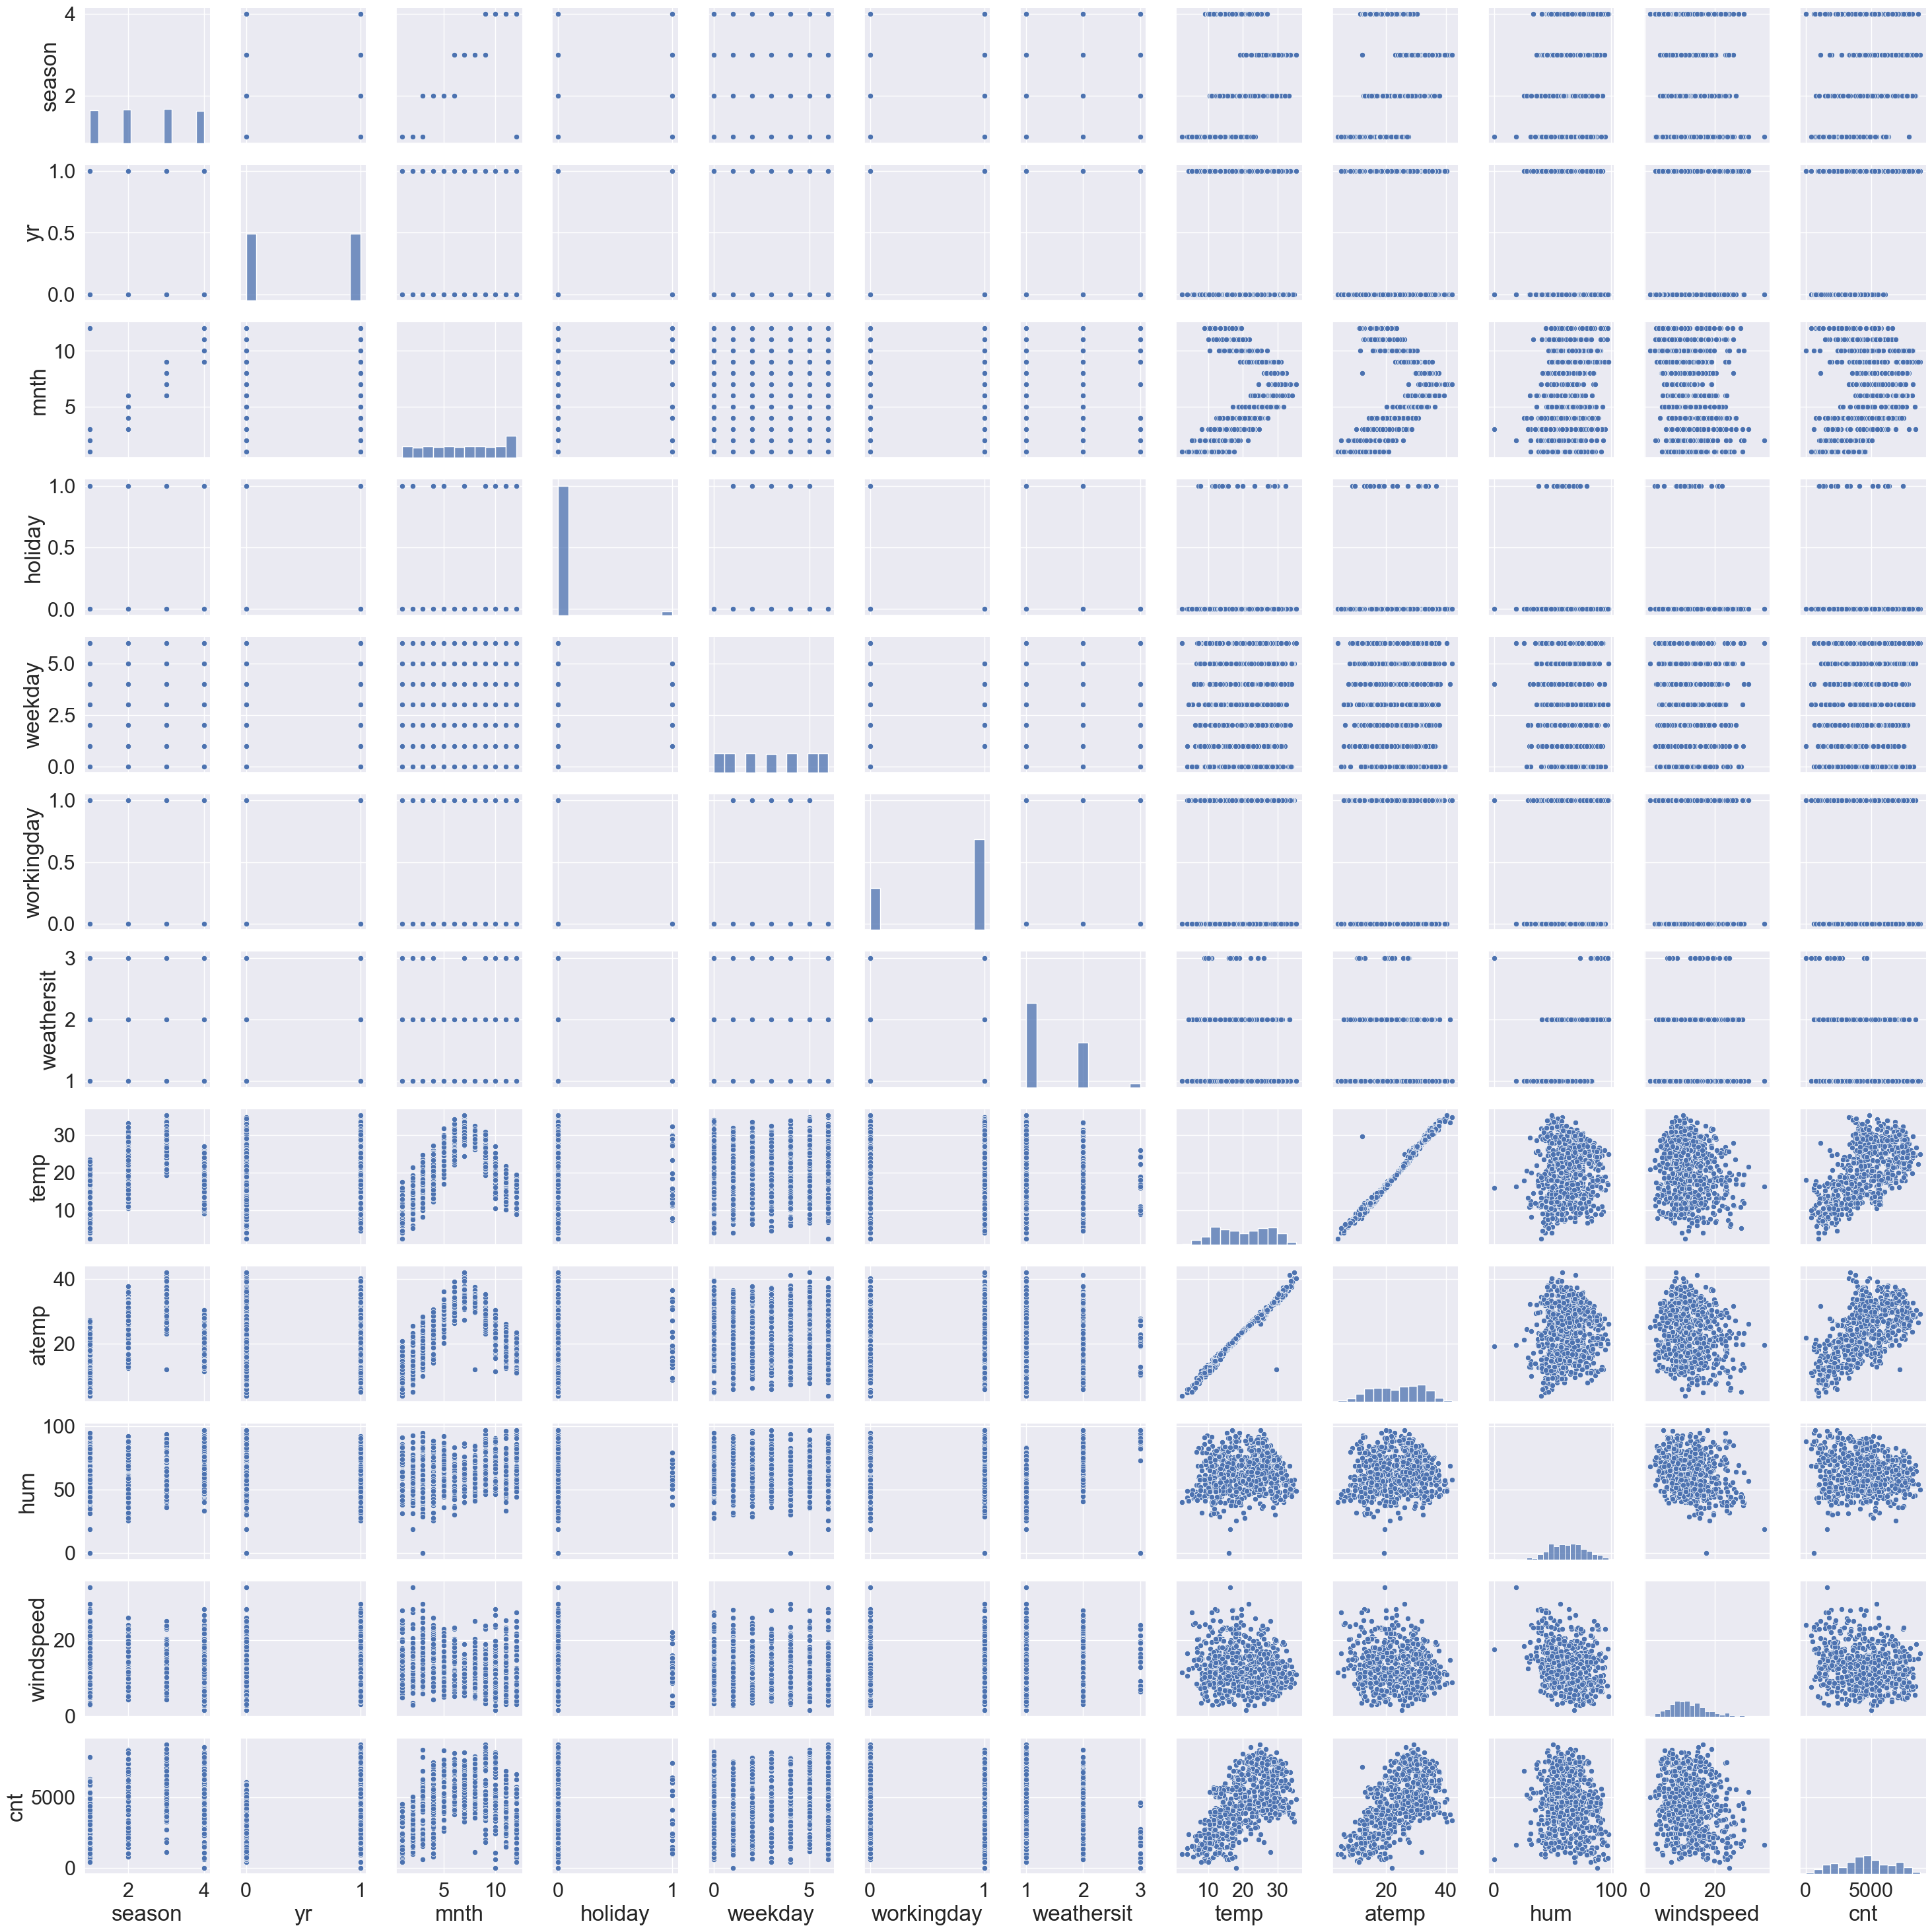

In [8]:
sns.set(font_scale=2)
sns.pairplot(bike)
plt.show()

#### Observation: atemp is a bit linear in nature for middle range values but humidity and windspeed are not.

#### observation - Apart from temp,atemp,hum and windspeed ll are categorical variable.

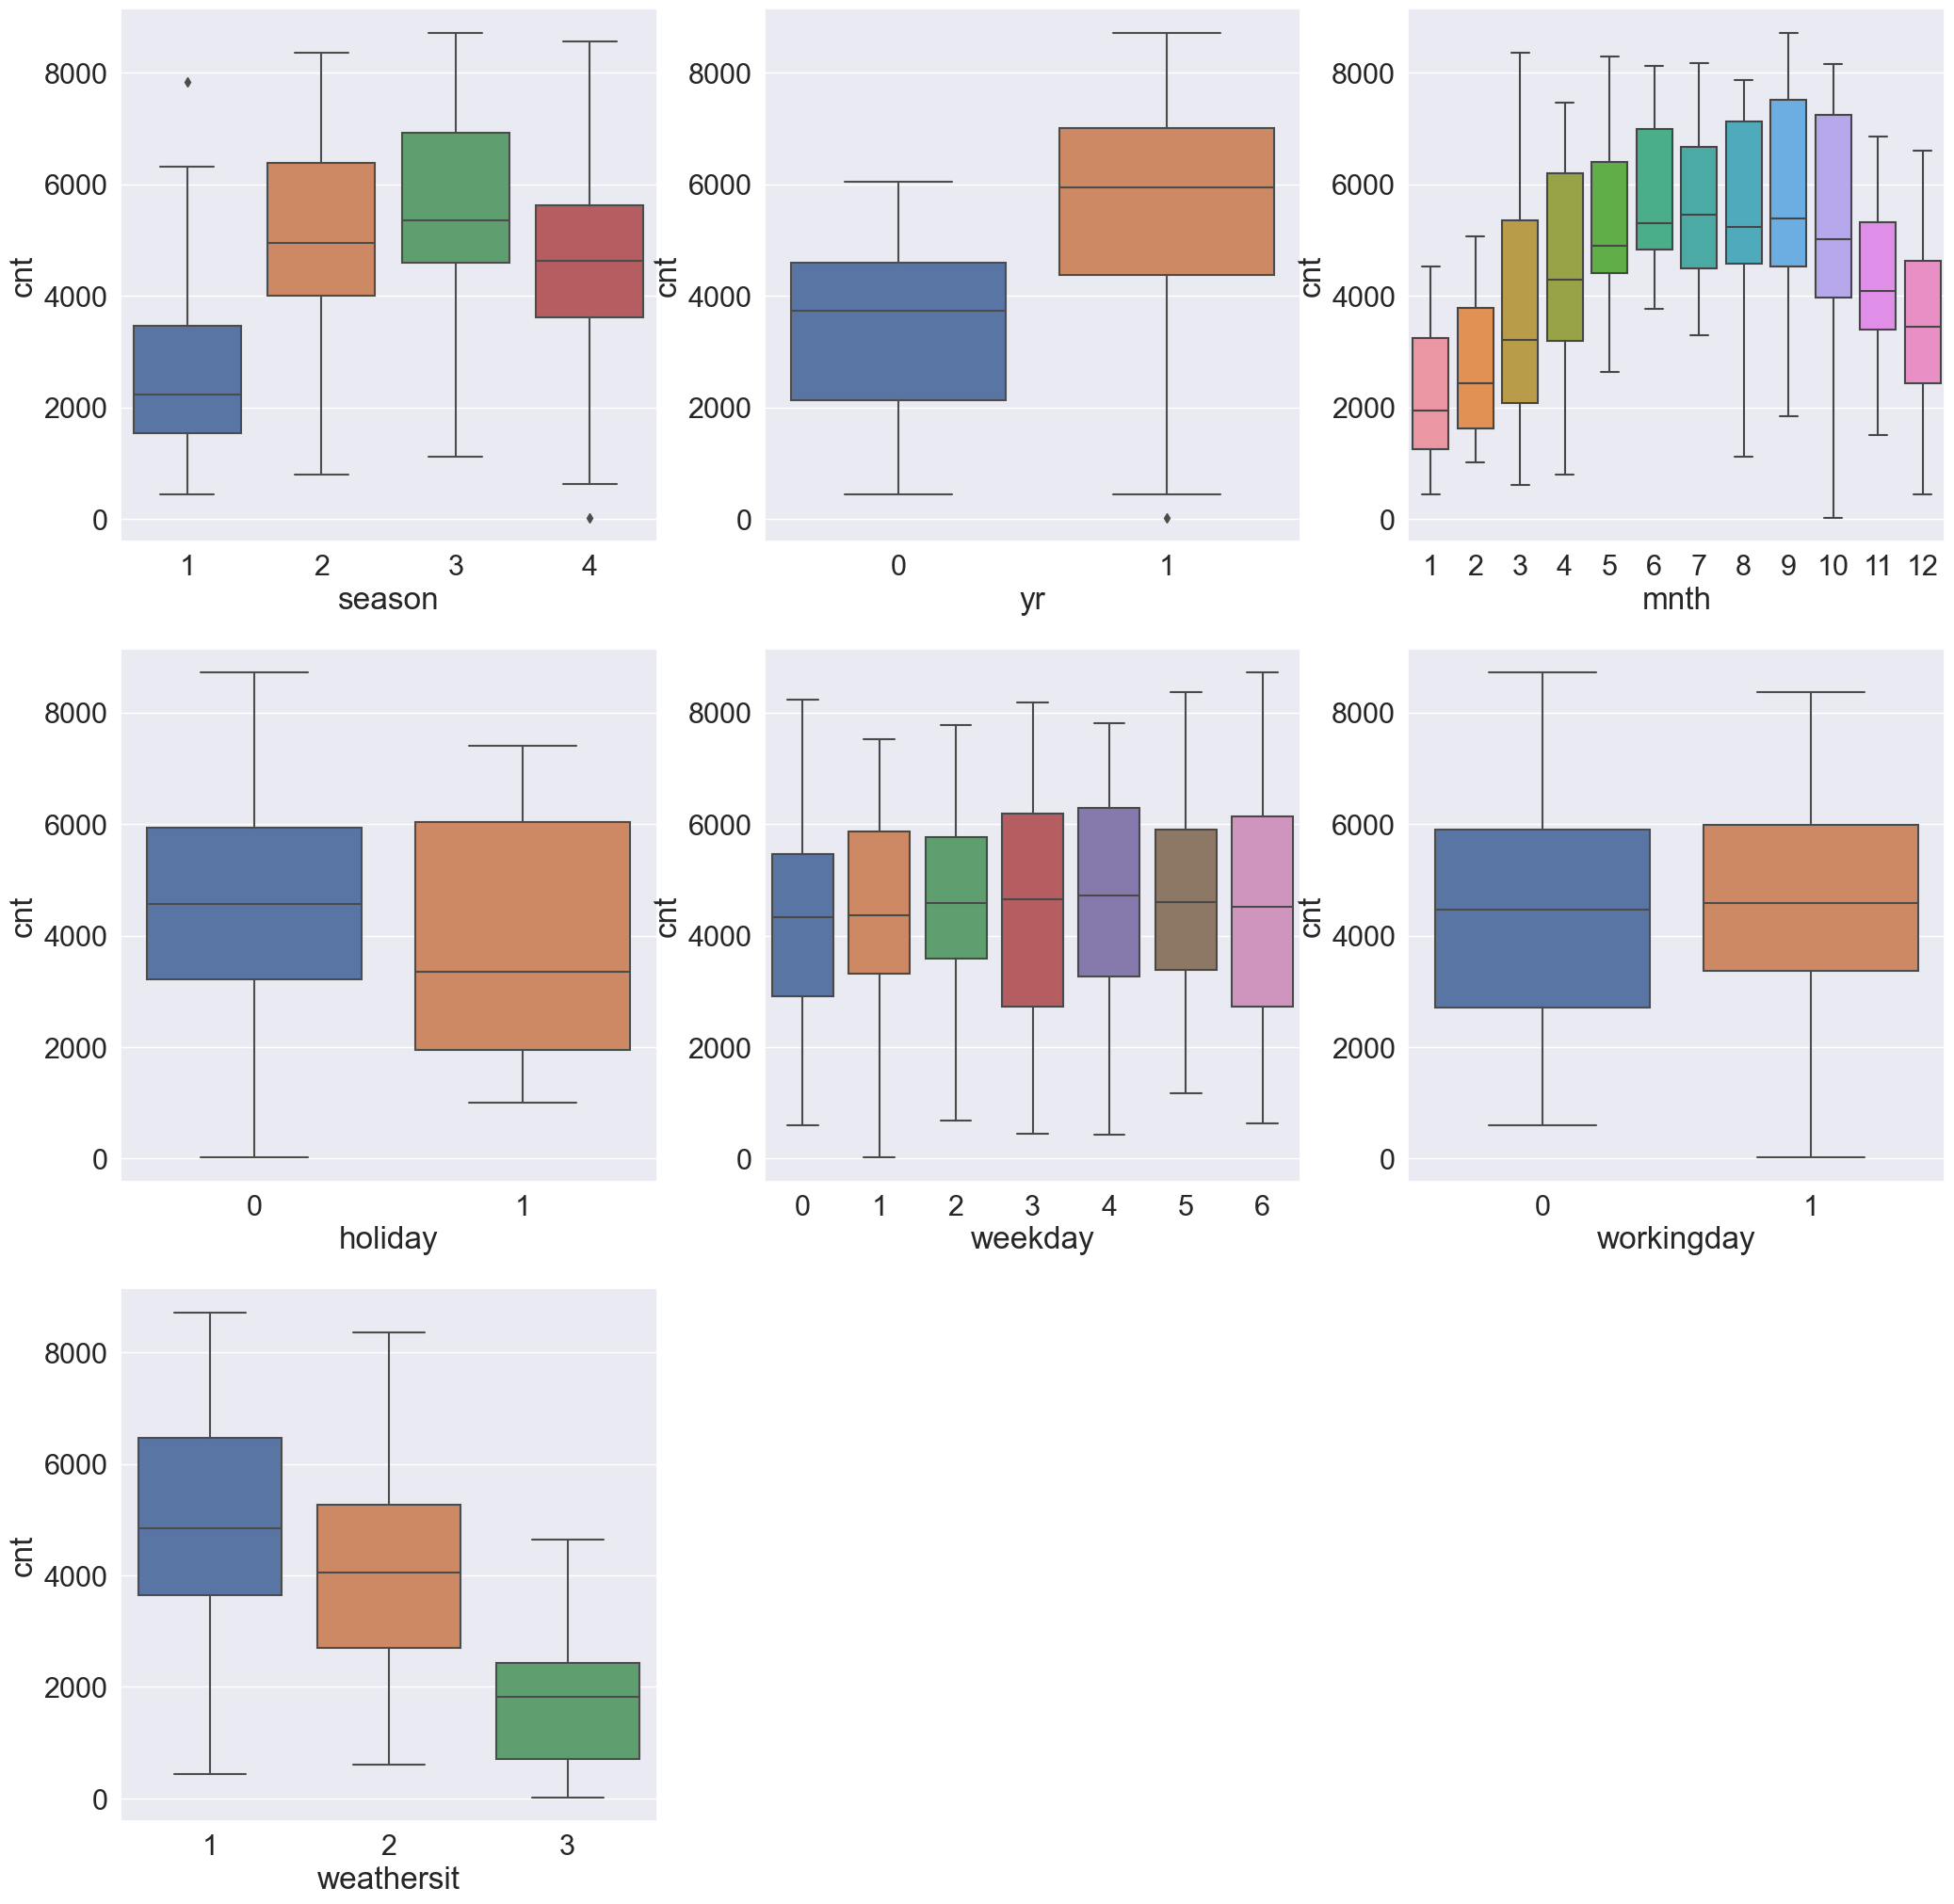

In [9]:
#### Plotting Non-categorical variable against 

plt.figure(figsize=(25, 25))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

#### Observations:-- 
    - More bikes were used in 2019 compared to 2018
    - More bikes were used in fall.
    - More bikes were used in the middle of the year on an average than in the start or the end of the year.
    - Mist/cloudy day had more bike users than rainy days.
    - Median(50%ile) is very consistent for bike usage in weekdays.
    - Working day has slightly higher use of bikes.
    

In [10]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## 3. Data Preparation

### one hot encoding on Weathersit, season, weekday & mnth

#### 1-hot encoding on Weathersit

- 00 means 'Clear_Weather'
- 10 means 'Mist_or_cloud'
- 01 means 'light rain'

In [11]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
weather = pd.get_dummies(bike['weathersit'],drop_first = True)
weather.rename(columns={1:'Clear_Weather', 2:'Mist_or_cloud', 3:'Light_rain'}, inplace=True)
weather.head()

,Mist_or_cloud,Light_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [13]:
#Concatenate weather to bike
bike = pd.concat([bike,weather], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


#### 1-hot encoding on season

- 000 means 'spring'
- 100 means 'summer'
- 010 means 'fall'
- 001 means 'winter'

In [14]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
season_name = pd.get_dummies(bike['season'], drop_first = True)
season_name.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)
season_name.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
# Concatenate season_name to bike
bike = pd.concat([bike,season_name], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


#### 1-hot encoding on weekday

    - 1000000 means 'Sunday'
    - 0100000 means 'Monday'
    - 0010000 means 'Tuesday'
    - 0001000 means 'Wednesday'
    - 0000100 means 'Thursday'
    - 0000010 means 'Friday'
    - 0000001 means 'Saturday'

In [17]:
Weekday_name = pd.get_dummies(bike.weekday)
Weekday_name.rename(columns={0:'Day_Tue', 1:'Day_Wed', 2:'Day_Thu', 3:'Day_Fri', 4:'Day_Sat', 5:'Day_Sun', 6:'Day_Mon'}, inplace=True)
Weekday_name = Weekday_name.drop(columns=['Day_Sun'], axis=1)

In [18]:
# Concatenate Weekday_name to bike
bike = pd.concat([bike,Weekday_name], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Day_Mon
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,1,0,0


#### 1-hot encoding on weekday

- 00000000000 means 'Month_Jan'
- 10000000000 means 'Month_Feb'
- 01000000000 means 'Month_Mar'
- 00100000000 means 'Month_Apr'
- 00010000000 means 'Month_May'
- 00001000000 means 'Month_June'
- 00000100000 means 'Month_July'
- 00000010000 means 'Month_Aug'
- 00000001000 means 'Month_Sep'
- 00000000100 means 'Month_Oct'
- 00000000010 means 'Month_Nov'
- 00000000001 means 'Month_Dec'

In [19]:
month_name = pd.get_dummies(bike.mnth)
month_name.rename(columns={1:'Month_Jan', 2:'Month_Feb', 3:'Month_Mar', 4:'Month_Apr', 5:'Month_May', 6:'Month_June', 7:'Month_July', 8:'Month_Aug', 9:'Month_Sep', 10:'Month_Oct', 11:'Month_Nov', 12:'Month_Dec'}, inplace=True)
# Concatenate month_name to bike
bike = pd.concat([bike,month_name], axis=1)
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Day_Mon,Month_Jan,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Drop 'weekday','season','weathersit' as we already did 1-hot encoding for these columns. 

In [20]:
bike = bike.drop(columns=['weekday','season','weathersit', 'mnth'], axis =1)


#### check/drop duplicates 

In [21]:
bike = bike.drop_duplicates()
bike.shape

(730, 31)

#### Check for missing values

In [22]:
bike.isnull().values.any()

False

In [23]:
bike.isnull().sum()

yr               0
holiday          0
workingday       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
Mist_or_cloud    0
Light_rain       0
summer           0
fall             0
winter           0
Day_Tue          0
Day_Wed          0
Day_Thu          0
Day_Fri          0
Day_Sat          0
Day_Mon          0
Month_Jan        0
Month_Feb        0
Month_Mar        0
Month_Apr        0
Month_May        0
Month_June       0
Month_July       0
Month_Aug        0
Month_Sep        0
Month_Oct        0
Month_Nov        0
Month_Dec        0
dtype: int64

#### No missing values found

In [24]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   Mist_or_cloud  730 non-null    uint8  
 9   Light_rain     730 non-null    uint8  
 10  summer         730 non-null    uint8  
 11  fall           730 non-null    uint8  
 12  winter         730 non-null    uint8  
 13  Day_Tue        730 non-null    uint8  
 14  Day_Wed        730 non-null    uint8  
 15  Day_Thu        730 non-null    uint8  
 16  Day_Fri        730 non-null    uint8  
 17  Day_Sat        730 non-null    uint8  
 18  Day_Mon   

#### Check correlation matrix

##### check and drop  outliers( < (Q1 - 1.5* IQR ) and > (Q3 + 1.5*IQR) )

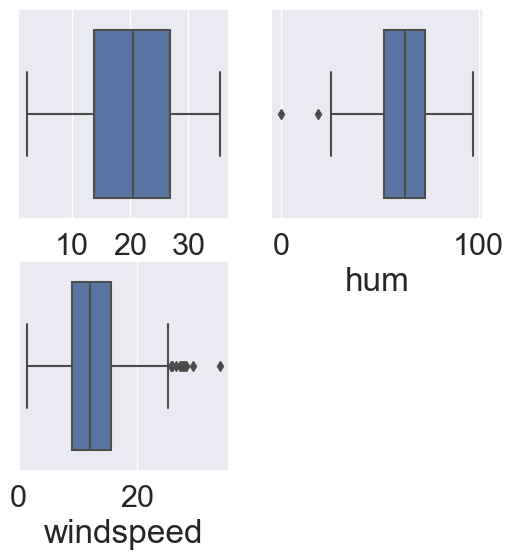

In [25]:
plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
sns.boxplot(bike["temp"]) 
plt.subplot(2,2,2)
sns.boxplot(bike["hum"])
plt.subplot(2,2,3)
sns.boxplot(bike["windspeed"])
plt.show()

In [26]:
bike.shape

(730, 31)

In [27]:
col = ["temp", "hum", "windspeed"]
for i in col:
    percentile_25 = np.quantile(bike[i], q=0.25)
    percentile_75 = np.quantile(bike[i], q=0.75)
    IQR = percentile_75 - percentile_25
    outliers_lower = percentile_25 - 1.5 * IQR
    outliers_upper = percentile_75 + 1.5 * IQR
    bike = bike[(bike[i]>outliers_lower) & (bike[i]<outliers_upper)]
    

In [28]:
bike.shape

(716, 31)

#### 14 rows got cleaned up as per the outlier treatment

#### Visualize non-categorical columns after outlier treatment

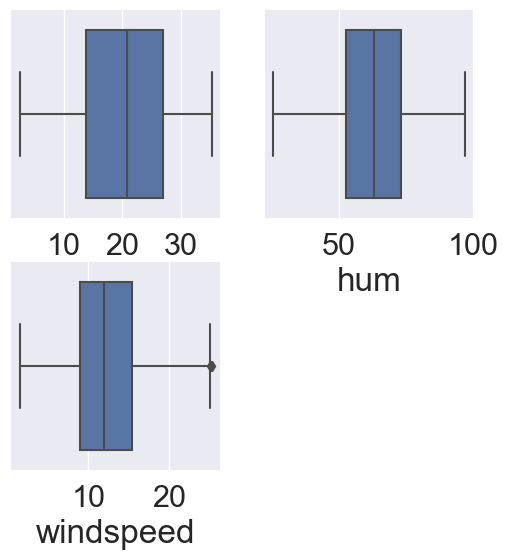

In [29]:
plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
sns.boxplot(bike["temp"]) 
plt.subplot(2,2,2)
sns.boxplot(bike["hum"])
plt.subplot(2,2,3)
sns.boxplot(bike["windspeed"])
plt.show()

## 4. Feature scaling/Normalization and test-train split

#### Use sklearn inbuilt function(train_test_split) to divide training and test set in 7:3 ratio

In [30]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 39)
df_train.shape, df_test.shape, bike.shape

((501, 31), (215, 31), (716, 31))

#### Normalization using sklearn MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Day_Mon,Month_Jan,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
284,0,0,1,22.276653,25.88585,90.6250,16.626050,2416,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
435,1,0,1,19.133347,22.97960,48.9167,13.916771,5298,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
256,0,0,1,27.606653,31.34500,69.7083,11.209100,4785,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Mist_or_cloud', 'Light_rain', 'summer', 'fall', 'winter',
       'Day_Tue', 'Day_Wed', 'Day_Thu', 'Day_Fri', 'Day_Sat', 'Day_Mon',
       'Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May',
       'Month_June', 'Month_July', 'Month_Aug', 'Month_Sep', 'Month_Oct',
       'Month_Nov', 'Month_Dec'],
      dtype='object')

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Day_Mon,Month_Jan,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
714,1,0,0,0.353391,18.49690,0.813805,0.175976,0.441111,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
284,0,0,1,0.593655,25.88585,0.907773,0.619870,0.280558,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
435,1,0,1,0.491792,22.97960,0.327146,0.498101,0.618305,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
256,0,0,1,0.766379,31.34500,0.616589,0.376404,0.558186,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
725,1,0,1,0.209455,11.33210,0.555105,0.926975,0.245166,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
df_train.shape

(501, 31)

#### After Normalization the max values for all the columns are between 0 & 1

In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Day_Mon,Month_Jan,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.493014,0.029940,0.706587,0.528120,23.656588,0.528767,0.432466,0.523525,0.339321,0.031936,0.233533,0.263473,0.251497,0.135729,0.139721,0.151697,0.145709,0.153693,0.127745,0.081836,0.079840,0.087824,0.075848,0.075848,0.081836,0.095808,0.073852,0.083832,0.081836,0.093812,0.087824
std,0.500451,0.170592,0.455781,0.245317,8.213903,0.194632,0.212412,0.226867,0.473952,0.176006,0.423501,0.440957,0.434307,0.342842,0.347043,0.359085,0.353166,0.361014,0.334139,0.274389,0.271317,0.283322,0.265020,0.265020,0.274389,0.294622,0.261792,0.277413,0.274389,0.291859,0.283322
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.316854,16.760850,0.384571,0.275286,0.356967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.533865,24.179150,0.524361,0.410068,0.529357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.749771,30.777100,0.668793,0.567398,0.691550,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check the correlation matrix to find multi-collinearity

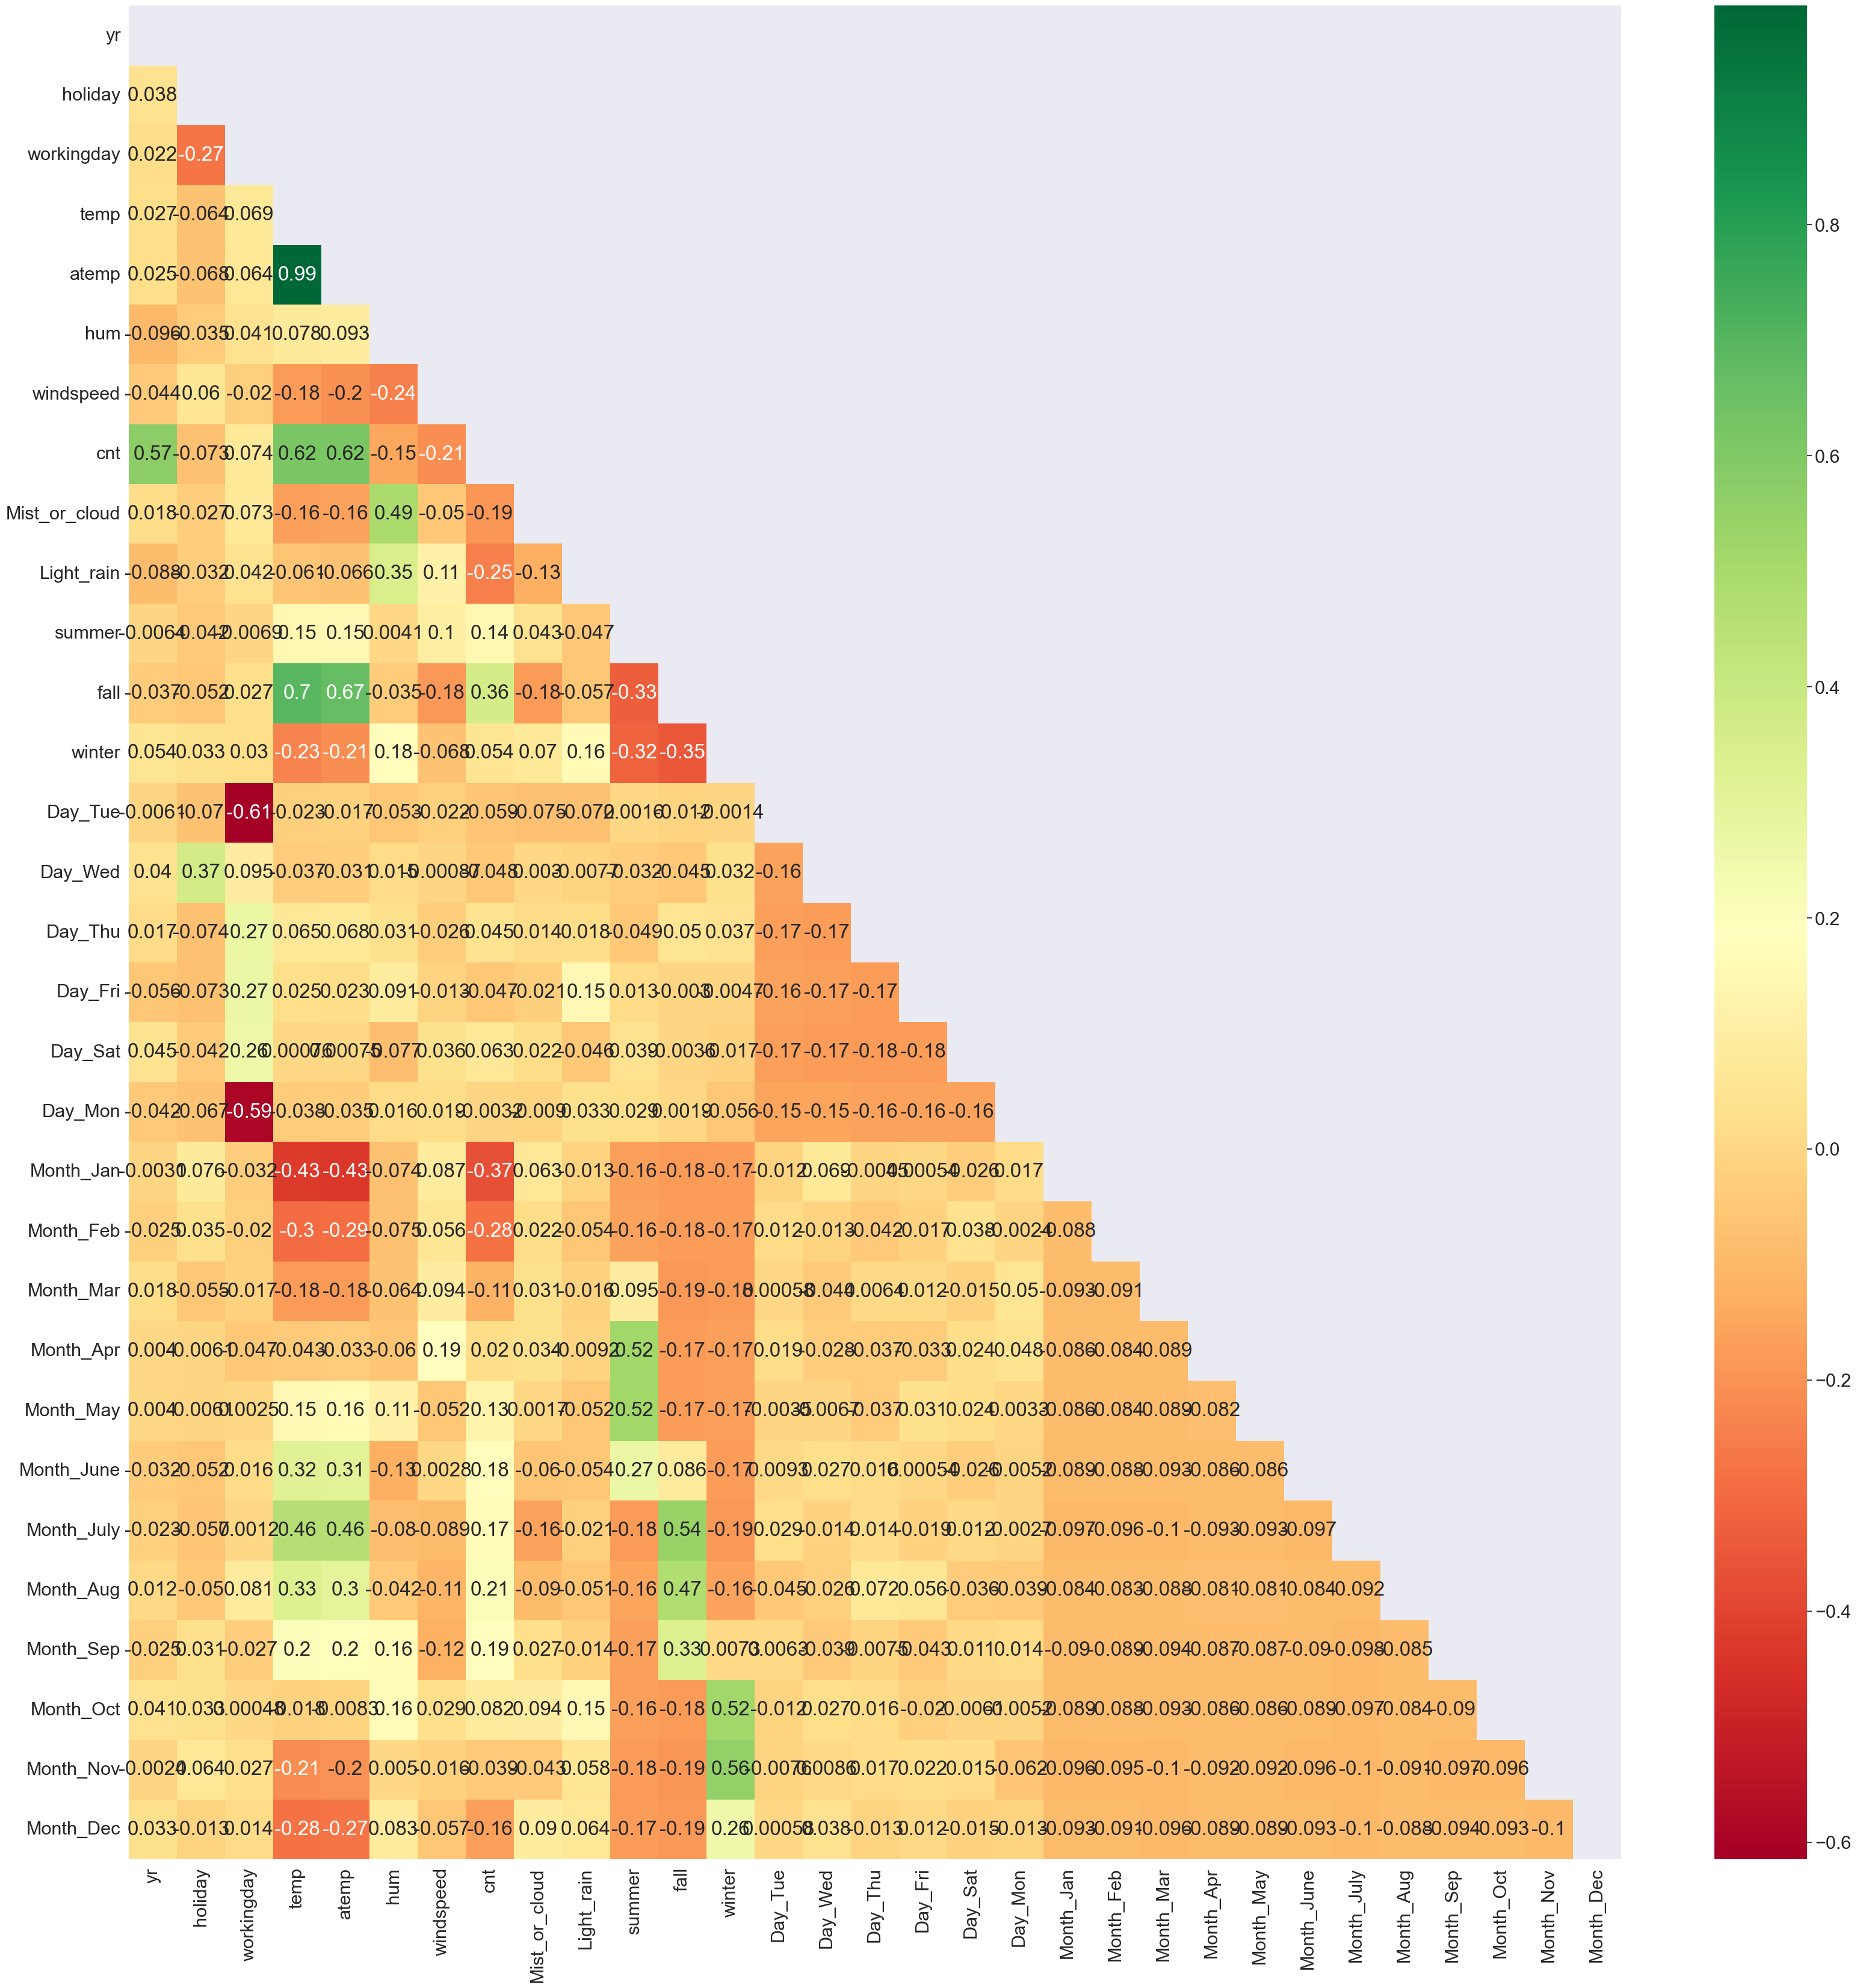

In [37]:
plt.figure(figsize = (40,40))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### Drop one column from each pair(of 2 independent variables) with correlation > 0.7

In [38]:
sorted_mat = bike.corr().unstack().sort_values()
sorted_mat[~(sorted_mat==1.0)] .head(10)

workingday  Day_Tue      -0.603576
Day_Tue     workingday   -0.603576
workingday  Day_Mon      -0.600150
Day_Mon     workingday   -0.600150
atemp       Month_Jan    -0.443889
Month_Jan   atemp        -0.443889
temp        Month_Jan    -0.436041
Month_Jan   temp         -0.436041
cnt         Month_Jan    -0.376140
Month_Jan   cnt          -0.376140
dtype: float64

#### - Observations : Based on the correlation matrix let's remove following columns which is not adding much value:--

    - temp and atemp gives similar information and highly correlated. we will drop atemp
    - Clear_Weather and Mist_or_cloud has very high correlation. we will drop 'Mist_or_cloud' as it's contributing less to the dependent variable


#### Dropping columns instant, dteday, temp  based on above observation

In [39]:
# check shape

bike.shape, bike.columns

((716, 31),
 Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt', 'Mist_or_cloud', 'Light_rain', 'summer', 'fall', 'winter',
        'Day_Tue', 'Day_Wed', 'Day_Thu', 'Day_Fri', 'Day_Sat', 'Day_Mon',
        'Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May',
        'Month_June', 'Month_July', 'Month_Aug', 'Month_Sep', 'Month_Oct',
        'Month_Nov', 'Month_Dec'],
       dtype='object'))

In [40]:
bike = bike.drop(columns=["atemp","Mist_or_cloud"])
bike.shape, bike.head()

((716, 29),
    yr  holiday  workingday       temp      hum  windspeed   cnt  Light_rain  \
 0   0        0           0  14.110847  80.5833  10.749882   985           0   
 1   0        0           0  14.902598  69.6087  16.652113   801           0   
 2   0        0           1   8.050924  43.7273  16.636703  1349           0   
 3   0        0           1   8.200000  59.0435  10.739832  1562           0   
 4   0        0           1   9.305237  43.6957  12.522300  1600           0   
 
    summer  fall  winter  Day_Tue  Day_Wed  Day_Thu  Day_Fri  Day_Sat  Day_Mon  \
 0       0     0       0        0        0        0        0        0        1   
 1       0     0       0        1        0        0        0        0        0   
 2       0     0       0        0        1        0        0        0        0   
 3       0     0       0        0        0        1        0        0        0   
 4       0     0       0        0        0        0        1        0        0   
 
    Month_Ja

#### Pop the dependent variable('cnt') from the training data set

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step - 5. Model building

#### Since there are 30 features, we will use sklearn RFE to find top 15 features impacting the dependent variable ('cnt')

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
X_train.shape

(501, 30)

#### Visualize the correlation of the selected features

In [44]:
sorted_mat = bike.corr().unstack().sort_values()
sorted_mat[~(sorted_mat == 1.0)] 

Day_Tue     workingday   -0.603576
workingday  Day_Tue      -0.603576
Day_Mon     workingday   -0.600150
workingday  Day_Mon      -0.600150
Month_Jan   temp         -0.436041
temp        Month_Jan    -0.436041
Month_Jan   cnt          -0.376140
cnt         Month_Jan    -0.376140
fall        summer       -0.347076
summer      fall         -0.347076
winter      fall         -0.340660
fall        winter       -0.340660
summer      winter       -0.332064
winter      summer       -0.332064
Month_Feb   temp         -0.304817
temp        Month_Feb    -0.304817
            Month_Dec    -0.286990
Month_Dec   temp         -0.286990
Month_Feb   cnt          -0.262531
cnt         Month_Feb    -0.262531
holiday     workingday   -0.255953
workingday  holiday      -0.255953
cnt         Light_rain   -0.234780
Light_rain  cnt          -0.234780
winter      temp         -0.234184
temp        winter       -0.234184
windspeed   cnt          -0.216685
cnt         windspeed    -0.216685
temp        Month_No

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)   
rfe = RFE(lm, n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mist_or_cloud', True, 1),
 ('Light_rain', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Day_Tue', False, 5),
 ('Day_Wed', False, 6),
 ('Day_Thu', False, 8),
 ('Day_Fri', False, 9),
 ('Day_Sat', False, 16),
 ('Day_Mon', True, 1),
 ('Month_Jan', False, 3),
 ('Month_Feb', False, 4),
 ('Month_Mar', False, 11),
 ('Month_Apr', False, 10),
 ('Month_May', False, 7),
 ('Month_June', False, 13),
 ('Month_July', True, 1),
 ('Month_Aug', False, 14),
 ('Month_Sep', True, 1),
 ('Month_Oct', False, 12),
 ('Month_Nov', True, 1),
 ('Month_Dec', False, 2)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Mist_or_cloud', 'Light_rain', 'summer', 'fall', 'winter', 'Day_Mon',
       'Month_July', 'Month_Sep', 'Month_Nov'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Day_Tue', 'Day_Wed', 'Day_Thu', 'Day_Fri', 'Day_Sat',
       'Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May',
       'Month_June', 'Month_Aug', 'Month_Oct', 'Month_Dec'],
      dtype='object')

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Function to create model and calculate VIF

In [50]:
# Adding a constant variable 
def create_model_calc_vif(X_train_rfe,y_train):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    #Let's see the summary of our linear model
    print(lm.summary())
    def calculate_vif(X_train_rfe):
        vif = pd.DataFrame()
        X = X_train_rfe
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)
    return calculate_vif(X_train_rfe)

In [51]:
create_model_calc_vif(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          5.64e-183
Time:                        11:05:08   Log-Likelihood:                 494.31
No. Observations:                 501   AIC:                            -956.6
Df Residuals:                     485   BIC:                            -889.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1661      0.024      6.989

#### observation: p-value of holiday and Month_Nov > 0.05. Let's drop Month_Nov as it has higher p-value

In [52]:
X_train_rfe_model_2 =  X_train_rfe.drop(columns=['Month_Nov'], axis =1)
create_model_calc_vif(X_train_rfe_model_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     183.4
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.28e-183
Time:                        11:05:08   Log-Likelihood:                 493.13
No. Observations:                 501   AIC:                            -956.3
Df Residuals:                     486   BIC:                            -893.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1633      0.024      6.883

#### Observation: p-value of holiday > 0.05. let's drop holiday

In [53]:
X_train_rfe_model_3 =  X_train_rfe_model_2.drop(columns=['holiday'], axis =1)
create_model_calc_vif(X_train_rfe_model_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          4.29e-184
Time:                        11:05:08   Log-Likelihood:                 491.51
No. Observations:                 501   AIC:                            -955.0
Df Residuals:                     487   BIC:                            -896.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1559      0.023      6.661

#### Model looks good but let's try to improve it further. Let's try to reduce VIF < 5 for all features. Let's drop fall.

In [54]:
X_train_rfe_model_4 =  X_train_rfe_model_3.drop(columns=['fall'], axis =1)
create_model_calc_vif(X_train_rfe_model_4,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          3.42e-180
Time:                        11:05:08   Log-Likelihood:                 479.46
No. Observations:                 501   AIC:                            -932.9
Df Residuals:                     488   BIC:                            -878.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1541      0.024      6.431

#### p-value and VIF looks good. So, seems to be our best Model.

## Step 5 - Residual Analysis of the train data and Goodness of fit check.

In [55]:
X_train_rfe_model_4.head()

,yr,workingday,temp,hum,windspeed,Mist_or_cloud,Light_rain,summer,winter,Day_Mon,Month_July,Month_Sep
714,1,0,0.353391,0.813805,0.175976,1,0,0,1,0,0,0
284,0,1,0.593655,0.907773,0.619870,0,1,0,1,0,0,0
435,1,1,0.491792,0.327146,0.498101,0,0,0,0,0,0,0
256,0,1,0.766379,0.616589,0.376404,0,0,0,0,0,0,1
725,1,1,0.209455,0.555105,0.926975,1,0,0,0,0,0,0


### Goodness of fit - Normality/Homoscedasticity Check

#### Let's compare model 3 and model 4

In [56]:
# Plot the histogram of the error terms

def plot_residuals(X_train_final,model_num, pos):
    ax = plt.subplot(2,1,pos)
    #X_train_final = X_train_rfe_model_4
    X_train_rfe_model_final = sm.add_constant(X_train_final)
    lm_final = sm.OLS(y_train,X_train_rfe_model_final).fit() 
    y_train_pred_final = lm_final.predict(X_train_rfe_model_final)
    sns.distplot((y_train - y_train_pred_final), bins = 20)
    ax.axvline(x=(y_train - y_train_pred_final).mean(),color='red')                # Plot heading 
    plt.xlabel('Errors', fontsize = 18)   # X-label
    ax.set_title("Model {} Error Distribution".format(model_num))  
    plt.show()
    
    ## Q-Q plot
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,2.5))
    _, (__, ___, r) = sp.stats.probplot(y_train - y_train_pred_final, plot=ax, fit=True)
    ax.set_title("Model {} Q-Q plot".format(model_num))  
    plt.show()
    
    #Checking Homoscedasticity
    plt.scatter(y_train_pred_final, y_train - y_train_pred_final)
    ax.set_title("Model {} Residual plot".format(model_num)) 
    plt.xlabel("fitted")
    plt.ylabel("Residual")
    plt.show()
    
    residual_mean = (y_train - y_train_pred_final).mean()
    print("Residual mean for Model {} is {}".format(model_num,residual_mean))
     
    return residual_mean, lm_final, y_train_pred_final, X_train_final
    


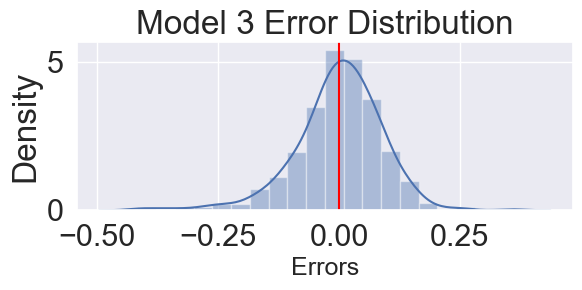

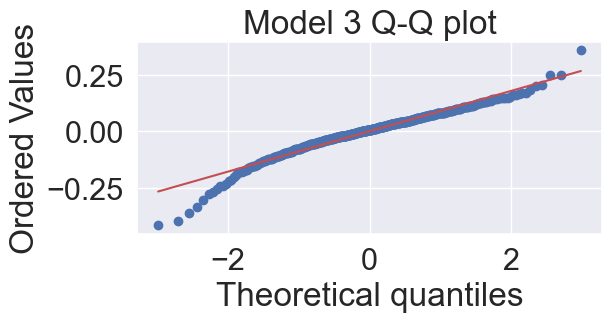

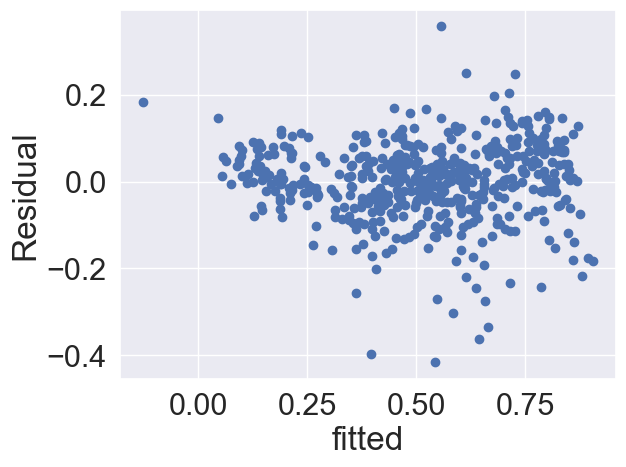

Residual mean for Model 3 is 1.0010843340806675e-15


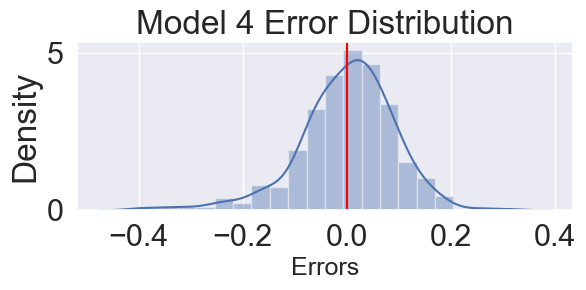

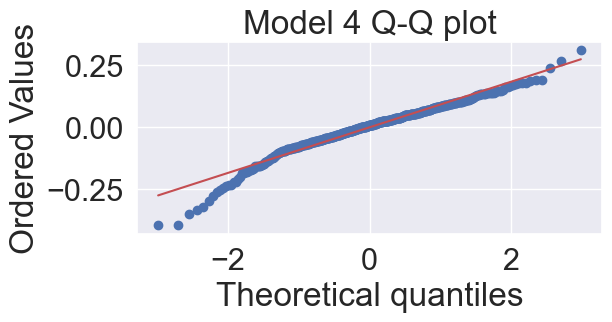

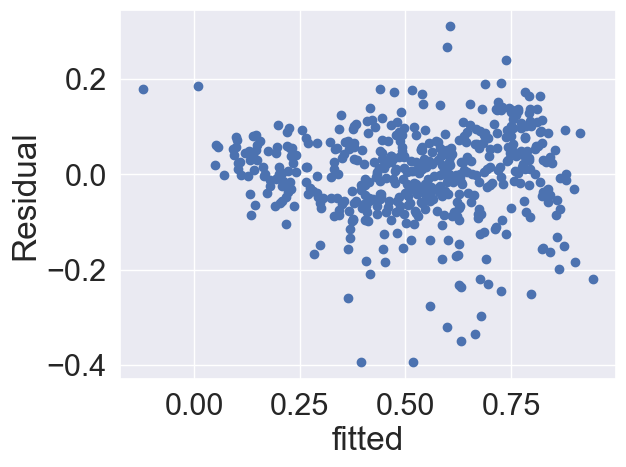

Residual mean for Model 4 is 5.010961705456358e-16
Resisual means residual_mean_model_3 : 1.0010843340806675e-15, residual_mean_model_4: 5.010961705456358e-16
Minimum residual mean is 5.010961705456358e-16


In [57]:
residual_mean_model_3, lm_final_3, y_train_pred_final_3, X_train_final_3 = plot_residuals(X_train_rfe_model_3,3,1)
residual_mean_model_4, lm_final_4, y_train_pred_final_4, X_train_final_4 = plot_residuals(X_train_rfe_model_4,4,2)

print(f'Resisual means residual_mean_model_3 : {residual_mean_model_3}, residual_mean_model_4: {residual_mean_model_4}')
print ("Minimum residual mean is {}".format(min(residual_mean_model_3,residual_mean_model_4)))


#### Observation: Good fit shows normality is a reasonable approximation even though it has light tails and it's not perfectly normal. Also, Model 4 has lower residual mean and higher accuracy making it our best model.

In [58]:
lm_final = lm_final_4
y_train_pred_final = y_train_pred_final_4
X_train_final = X_train_final_4

#### Observations(based on model 4):--
#### High value of omnibus and lower probability of omnibus indicate residual is not perfect normal and a bit skewed.
#### Negative skew values shows it has fatter tail on the left side which can be observed in the residual histogram.
#### Lowe prob(JB) stats suggests residual is not completely normal
#### Durbin-watson ~2 shows model feature variables are independent with no correlation among each other


- Omnibus:                       67.868   Durbin-Watson:                   2.081
- Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.396
- Skew:                          -0.759   Prob(JB):                     5.38e-31
- Kurtosis:                       5.091   Cond. No.                         17.2

### Multi-collinearity check 

#### VIF in model 4 is less than 5. so, there is no multi-collinearity

        Features    VIF
0           const  32.43
4             hum   2.15
6   Mist_or_cloud   1.74
3            temp   1.72
2      workingday   1.59
11     Month_July   1.59
10        Day_Mon   1.57
7      Light_rain   1.49
8          summer   1.39
9          winter   1.28
12      Month_Sep   1.23
5       windspeed   1.19
1              yr   1.04

Also, Durbin-watson ~2 shows model feature variables are independent with no correlation among each other.

#### Homoscedasticity check using breuschpagan and white-Test

In [59]:
import statsmodels.stats.diagnostic as sms
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lm_final.resid, lm_final.model.exog)
list(zip(name, test))



[('Lagrange multiplier statistic', 44.2527498210735),
 ('p-value', 1.3829226894666224e-05),
 ('f-value', 3.9400605594275793),
 ('f p-value', 8.175139298870536e-06)]

In [60]:
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(lm_final.resid,  lm_final.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 151.89235591663737, 'Test Statistic p-value': 1.7746600614765137e-07, 'F-Statistic': 2.5449635987917723, 'F-Test p-value': 2.8965621205728793e-09}


#### Observation : Both tests show the pvalue < 0.05, we can reject the null hypothesis and accept the alternate hypothesis which Heteroscedasticity is present

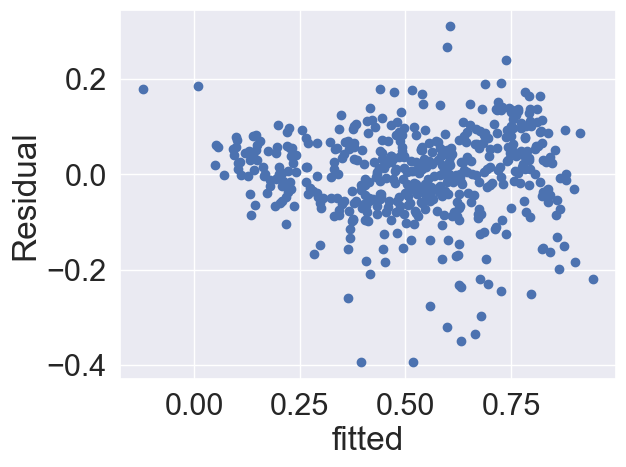

In [61]:
plt.scatter(y_train_pred_final, y_train - y_train_pred_final)
plt.xlabel("fitted")
plt.ylabel("Residual")
plt.show()

#### Observation : Same observation can be made using the Residual and fitted plot i.e. Heteroscedasticity is present

## Making predictions using final model

#### Normalize the test data

In [62]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])



In [63]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Day_Mon,Month_Jan,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.511628,0.027907,0.632558,0.543915,24.205850,0.516354,0.436272,0.542014,0.339535,0.018605,0.297674,0.260465,0.232558,0.162791,0.148837,0.125581,0.134884,0.111628,0.176744,0.093023,0.055814,0.065116,0.093023,0.111628,0.088372,0.065116,0.116279,0.083721,0.088372,0.060465,0.079070
std,0.501031,0.165091,0.483233,0.241154,8.038613,0.191810,0.225652,0.225456,0.474657,0.135439,0.458303,0.439913,0.423449,0.370036,0.356759,0.332150,0.342397,0.315643,0.382342,0.291143,0.230098,0.247307,0.291143,0.315643,0.284498,0.247307,0.321307,0.277615,0.284498,0.238903,0.270477
min,0.000000,0.000000,0.000000,-0.049680,3.953480,0.049884,-0.059963,0.047932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327372,17.234175,0.368619,0.277137,0.411227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.589226,26.199150,0.524361,0.425049,0.540021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742574,30.366450,0.661832,0.563634,0.710594,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.016608,40.245650,0.954151,1.011217,1.018634,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Remove 'cnt' from the test set and add it to y_test true label. Keep only columns which are relevant in the test set(drop the one which were dropped in training set)

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test[X_train_final.columns]

In [65]:
X_test.head()

,yr,workingday,temp,hum,windspeed,Mist_or_cloud,Light_rain,summer,winter,Day_Mon,Month_July,Month_Sep
497,1,0,0.685553,0.448376,0.550510,0,0,1,0,0,0,0
233,0,1,0.790738,0.300464,0.705994,0,0,0,0,0,0,0
295,0,0,0.432003,0.678074,0.172273,0,0,0,1,0,0,0
103,0,1,0.492899,0.398492,0.205963,0,0,1,0,0,0,0
565,1,1,0.756414,0.821346,0.501877,1,0,0,0,0,1,0


#### Make prediction using final model and plot y_test vs y_pred

In [66]:
# Making predictions using the final model
#len(X_test.columns)
X_test_final = sm.add_constant(X_test)
len(X_test_final.columns)
y_test_pred_final = lm_final.predict(X_test_final)


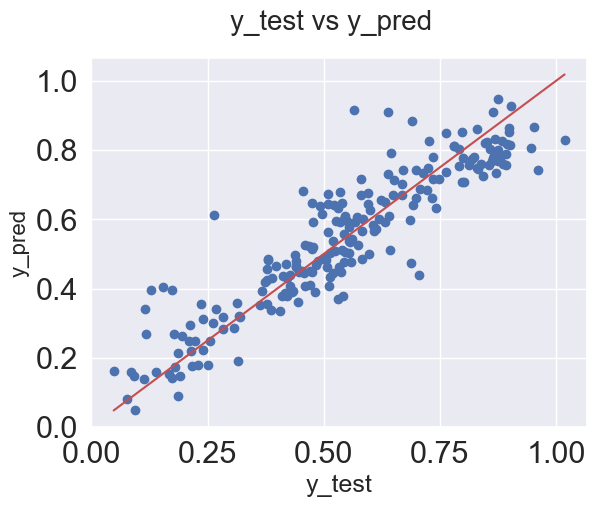

In [67]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
X_plot = [y_test.min(), y_test.max()]
plt.plot(X_plot, X_plot, color='r')
plt.show()

#### Observation: Above graph looks linear with some variation

#### Model 4 is the best model. Accuracy on training data is 83% and test-data is 83%. Model is generalizing well on test data

In [68]:
from sklearn.metrics import r2_score
#r2_score(y_train,y_train_pred_final) , r2_score(y_test,y_test_pred_final)

print(f"R-square on training data is {r2_score(y_train,y_train_pred_final):.2f} and test data is {r2_score(y_test,y_test_pred_final):.2f}, difference is {(r2_score(y_train,y_train_pred_final)- r2_score(y_test,y_test_pred_final)):.2f}")
#y_train.shape, y_train_pred_final.shape, y_test.shape, y_test_pred_final.shape

r2_score(y_test, y_test_pred_final)


R-square on training data is 0.83 and test data is 0.83, difference is -0.00


0.8326414128375141

In [69]:
coeff = round(lm_final.params,2)
weights = coeff.sort_values(ascending = False)
print(weights)
print("\n\nFinal Model:")
for weight in range(0, len(weights)):
    print(weights[weight],'*',weights.index[weight],end ='')
    print(' + ',end ='')

temp             0.57
yr               0.23
const            0.15
winter           0.14
Month_Sep        0.09
summer           0.08
Day_Mon          0.08
workingday       0.05
Month_July      -0.04
Mist_or_cloud   -0.05
windspeed       -0.10
hum             -0.16
Light_rain      -0.21
dtype: float64


Final Model:
0.57 * temp + 0.23 * yr + 0.15 * const + 0.14 * winter + 0.09 * Month_Sep + 0.08 * summer + 0.08 * Day_Mon + 0.05 * workingday + -0.04 * Month_July + -0.05 * Mist_or_cloud + -0.1 * windspeed + -0.16 * hum + -0.21 * Light_rain + 

#### Observations/Conclusion:--
    
    -  Top 3 contributors :- 
        1.temp - coeff: 0.57 - impacts in a positive way. It it increases, count/demand increases for the bike
        2. yr - coeff: 0.23,  impacts in a positive way. year 2019 contributes more to the demand of bikes.
        3. Light Rain coeff:  -0.21, negatively impacts the demand. When there is Light rain, demand decreases as expected.

    -  Winter season is attracting people more to use bikes.
    -  In Sep, Oct and Aug the demand is high for the bikes
    -  In case of high humidity, wind speed and rain, the demand is low as expected
    - Month_July,Mist_or_cloud, windspeed, hum, Light_rain has negative coefficient which shows if weather is bad less users use bike.

#### Recommendations:--
  -  Company need to go creative to increase the demand on the bad weather or summer days. Few suggestions are:-- 
            a)They can reduce the price maybe slice it by half
            b)Provide rain-coats along with the bike on rainy days
            c)Introduce and provide extra credits points during summer and bad weather days.

#### Best fit line equation:--
   #### = 0.57 * temp + 0.23 * yr + 0.14 * winter + 0.09 * Month_Sep + 0.08 * summer + 0.08 * Day_Mon + 0.05 * workingday + -0.04 * Month_July + -0.05 * Mist_or_cloud + -0.1 * windspeed + -0.16 * hum + -0.21 * Light_rain + 0.15

#### We have got a decent model with decent accuracy(83%) .
### Well, we can try to improve this model further:--
    1.By trying to fix hetroscedasticity, a litle hetroscedasticity which is not that bad but can be weighted regrssion. It wll make the coefficients more precised.
    2.Even a non-linear model can be tried to fit to see if it improves the accuracy.